# Phishing Detector with LR


### IMPORT THE NECESSARY LIBRARIES

In [1]:
# ! pip install fast-ml

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib notebook

In [3]:
df = pd.read_csv("phishing_data.txt",
                 header=None, 
                 names=['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 
                        'HTTPS','DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
                        'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding',
                        'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
                        'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 
                        'class'])

In [4]:
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [5]:
print(df.columns.tolist())

['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'class']


# DATASET EXPLORATION

In [6]:
df.shape

(11055, 31)

In [7]:
df.isnull().any().sum()

0

In [50]:
df.describe().T.head(3)

,count,mean,std,min,25%,50%,75%,max
UsingIP,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
LongURL,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0


# Split the DataFrame

#Train-Valid-Test Split

In [9]:
target = "class"
y = df[target]
X = df.drop(columns=target)

In [10]:
y.shape

(11055,)

In [11]:
X.shape

(11055, 30)

In [12]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target=target, train_size=0.6, valid_size=0.1, test_size=0.3, random_state=0)

In [13]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(6633,)
(1105,)
(3317,)


# ITERATE - fitting your model into the training data

In [14]:
model = LR()

In [15]:
param_grid = {'C': [0.1, 1, 10]} # C — Inverse of regularization strength; smaller values specify stronger regularization
clf = GridSearchCV(model, param_grid=param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [16]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1}
Accuracy : 0.9317031919718209


# Evaluate the model on the validation set

In [17]:
y_val_pred = clf.predict(X_valid)

In [18]:
print("Accuracy:", accuracy_score(y_valid, y_val_pred))

Accuracy: 0.9239819004524887


In [19]:
print(classification_report(y_valid, y_val_pred))
print(confusion_matrix(y_valid, y_val_pred))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       500
           1       0.92      0.94      0.93       605

    accuracy                           0.92      1105
   macro avg       0.92      0.92      0.92      1105
weighted avg       0.92      0.92      0.92      1105

[[453  47]
 [ 37 568]]


# Finalize the model by training it on both the training and validation sets

In [20]:
X_train_val = np.concatenate((X_train, X_valid))
y_train_val = np.concatenate((y_train, y_valid))
clf.fit(X_train_val, y_train_val)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

# Evaluate the final model on the testing set

In [21]:
y_test_pred = clf.predict(X_test)
print("Classification_report:\n", classification_report(y_test, y_test_pred))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_test_pred))     # The confusion_matrix function is used to shows how many samples were correctly or incorrectly classified by a model

Classification_report:
               precision    recall  f1-score   support

          -1       0.93      0.90      0.92      1491
           1       0.92      0.95      0.93      1826

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.92      3317
weighted avg       0.93      0.93      0.93      3317

Confusion_matrix:
 [[1342  149]
 [  99 1727]]


# Exercise 2, training with only two parameters "PrefixSuffix" and "AnchorURL"

In [22]:
df = pd.read_csv("phishing_data.txt",
                 header=None, 
                 names=['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 
                        'HTTPS','DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
                        'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding',
                        'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
                        'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 
                        'class'])

In [23]:
df_2 = df[["PrefixSuffix-", "AnchorURL", "class"]]

df_2["class"] = df_2["class"].map({-1: 0, 1: 1})

df_2.head()

,PrefixSuffix-,AnchorURL,class
0,-1,-1,0
1,-1,0,0
2,-1,0,0
3,-1,0,0
4,-1,0,1


# Split the DataFrame

In [24]:
target = "class"
y = df_2[target]
X = df_2.drop(columns=target)

In [25]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_2, target=target, 
                                                                            train_size=0.6, valid_size=0.1, 
                                                                            test_size=0.3, random_state=0)

ITERATE - fitting your model into the training data

In [26]:
model_2 = LR()

In [27]:
param_grid = {'C': [0.1, 1, 10]} # C — Inverse of regularization strength; smaller values specify stronger regularization
clf = GridSearchCV(model_2, param_grid=param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [28]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.1}
Accuracy : 0.847127248093603


# Evaluate the model on the validation set

In [29]:
y_val_pred = clf.predict(X_valid)
print("Accuracy:", accuracy_score(y_valid, y_val_pred))

Accuracy: 0.848868778280543


In [30]:
print("Classification_report:\n", classification_report(y_valid, y_val_pred))
print("Confusion_matrix:\n", confusion_matrix(y_valid, y_val_pred))

Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80       500
           1       0.78      1.00      0.88       605

    accuracy                           0.85      1105
   macro avg       0.89      0.83      0.84      1105
weighted avg       0.88      0.85      0.84      1105

Confusion_matrix:
 [[334 166]
 [  1 604]]


In [31]:
X_train_val = np.concatenate((X_train, X_valid))
y_train_val = np.concatenate((y_train, y_valid))
clf.fit(X_train_val, y_train_val)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]})

In [32]:
y_test_pred = clf.predict(X_test)
print("Classification_report:\n", classification_report(y_test, y_test_pred))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_test_pred))  

Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.80      1491
           1       0.79      1.00      0.88      1826

    accuracy                           0.85      3317
   macro avg       0.89      0.84      0.84      3317
weighted avg       0.88      0.85      0.85      3317

Confusion_matrix:
 [[1009  482]
 [   7 1819]]


# plot the decision boundary of a classifier
##### we need to reduce the feature space to 2D, which means we need to select two features to plot. Here, we will select the "PrefixSuffix-" and "URLAnchor"


<IPython.core.display.Javascript object>


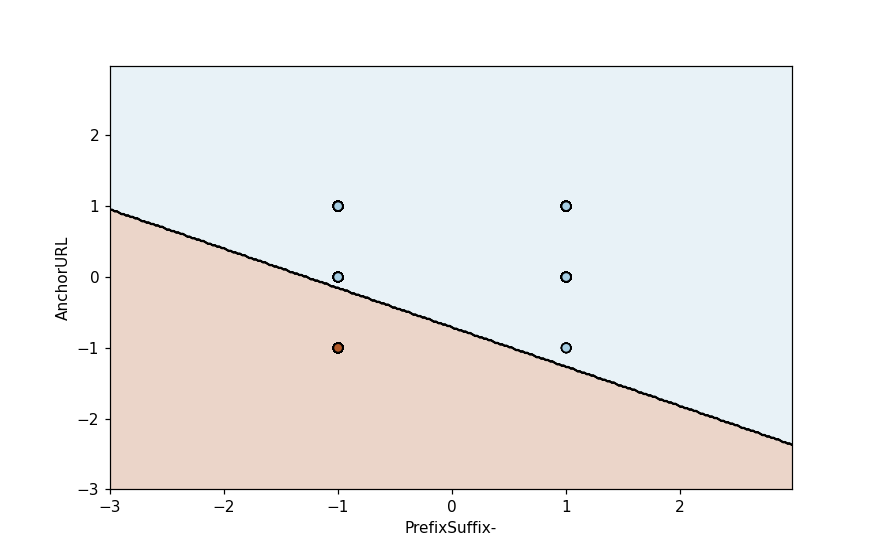

Text(0, 0.5, 'AnchorURL')

In [47]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 100*h, X[:,0].max() + 100*h
    y_min, y_max = X[:,1].min() - 100*h, X[:,1].max() + 100*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')
    
plot_decision_boundary(clf, X_test.to_numpy(), y_test.to_numpy())

ax = plt.gca()

ax.set_xlabel("PrefixSuffix-")
ax.set_ylabel("AnchorURL")